<a href="https://colab.research.google.com/github/aldysptr28/Pengolahan_Citra_Digital/blob/main/Butterworth_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open the image
f = cv2.imread('muncak.jpg',0)

In [3]:
# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

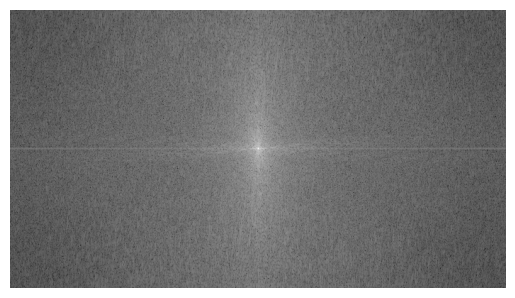

In [4]:
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)

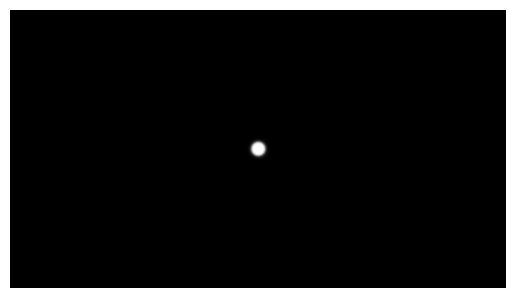

In [6]:
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

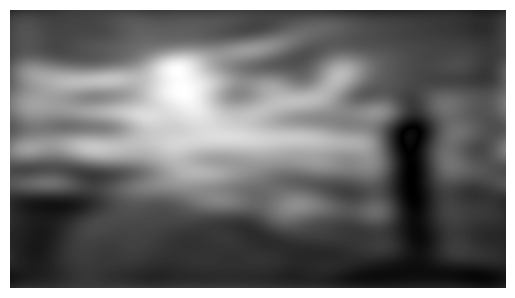

In [8]:
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)

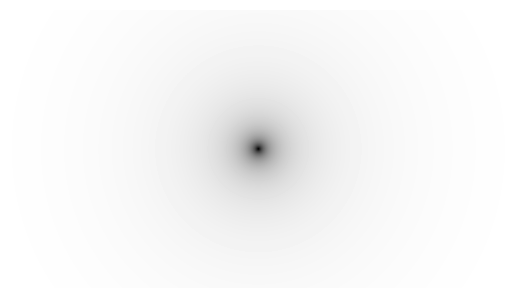

In [10]:
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

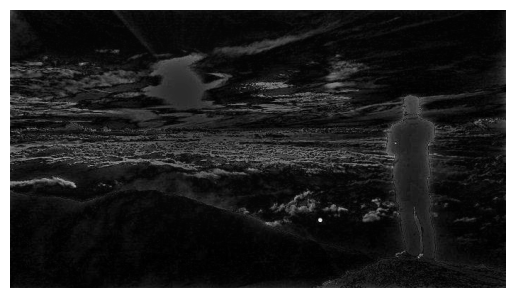

In [12]:
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()